機械学習の課題

色んな説明変数でボイラ販売台数予想を行う

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
os.getcwd()

'C:\\Users\\User\\Desktop'

生データをデータの読み込み、表示する

In [3]:
#ファイル選択
df_boiler = pd.read_csv("boiler_buy_num2.csv")
df_boiler.dropna()

#頭と尻の10行づつ表示
display(df_boiler.head(10))
display(df_boiler.tail(10))

,Boiler_A(L),Boiler_B(L),Boiler_A'(G),Boiler_B'(G),time,time_2,Crude oil price(dollar/ballel),Conversion rate(yen/dollar),C heavy oil price(yen/kl),LP gas price(yen/t),Capital investment(oku-yen),Nikkei average(yen),Change in capital investment change (%),Miura Kogyo stock price(yen)
0,11,10,12,22,2008_1,1,128.200,107.78,89550,326008.73,5789.101,12569.846670,-2.5,788.336667
1,5,18,12,31,2008_2,2,74.100,101.64,52100,328258.07,5259.696,8649.603333,-11.8,697.886667
2,11,12,19,31,2008_3,3,44.930,91.56,30000,321783.20,5259.696,7890.666667,-11.8,713.890000
3,13,15,9,31,2008_4,4,54.820,97.97,37550,316079.53,3149.271,9436.400000,-45.6,706.666667
4,3,7,8,13,2009_1,5,71.370,95.44,47100,315003.07,3149.271,10327.530000,-45.6,795.556667
5,14,12,3,10,2009_2,6,75.010,90.47,47400,313139.33,3345.167,9975.576667,-36.4,800.003333
6,7,10,8,26,2009_3,7,77.530,90.46,48950,302471.07,3345.167,10471.336670,-36.4,789.670000
7,9,12,9,13,2009_4,8,80.886,91.96,51750,303322.60,3939.738,10069.580000,25.1,719.556667
8,2,4,9,1,2010_1,9,75.620,88.16,47300,304093.80,3939.738,9243.570000,25.1,634.333333
9,5,23,5,8,2010_2,10,81.840,83.04,47350,311998.60,3930.571,9789.470000,17.5,668.223333


,Boiler_A(L),Boiler_B(L),Boiler_A'(G),Boiler_B'(G),time,time_2,Crude oil price(dollar/ballel),Conversion rate(yen/dollar),C heavy oil price(yen/kl),LP gas price(yen/t),Capital investment(oku-yen),Nikkei average(yen),Change in capital investment change (%),Miura Kogyo stock price(yen)
35,12,29,7,28,2016_4,36,52.67,111.94,42800,333929.6,6057.774,19626.91333,5.2,2071.666667
36,5,12,4,9,2017_1,37,49.39,111.15,40500,333929.6,6057.774,19975.90000,5.2,2397.000000
37,19,18,5,17,2017_2,38,58.61,112.33,46950,333929.6,7052.704,22500.50333,8.6,2852.333333
38,23,23,13,13,2017_3,39,66.54,110.79,51450,333929.6,7052.704,22206.94333,8.6,3158.333333
39,10,25,12,35,2017_4,40,71.39,107.86,53250,333929.6,6766.533,22324.73333,11.7,2973.333333
40,16,9,15,11,2018_1,41,76.12,110.94,58550,333929.6,6766.533,23179.63667,11.7,3186.000000
41,18,22,8,19,2018_2,42,77.34,112.84,60700,333929.6,7278.390,21428.76333,3.2,2765.000000
42,24,16,5,19,2018_3,43,62.45,110.72,49500,333929.6,7278.390,21121.48667,3.2,2600.333333
43,14,14,8,28,2018_4,44,72.16,111.06,55750,325880.2,6753.000,21378.61333,-0.2,3174.333333
44,3,7,0,4,2019_1,45,66.33,108.74,51550,325880.2,6753.000,21112.95000,-0.2,3027.000000


欠損値が無いか確認を行う。 count()関数なり。

In [4]:
df_boiler.count()

Boiler_A(L)                                45
Boiler_B(L)                                45
Boiler_A'(G)                               45
Boiler_B'(G)                               45
time                                       45
time_2                                     45
Crude oil price(dollar/ballel)             45
Conversion rate(yen/dollar)                45
C heavy oil price(yen/kl)                  45
LP gas price(yen/t)                        45
Capital investment(oku-yen)                45
Nikkei average(yen)                        45
Change in capital investment change (%)    45
Miura Kogyo stock price(yen)               45
dtype: int64

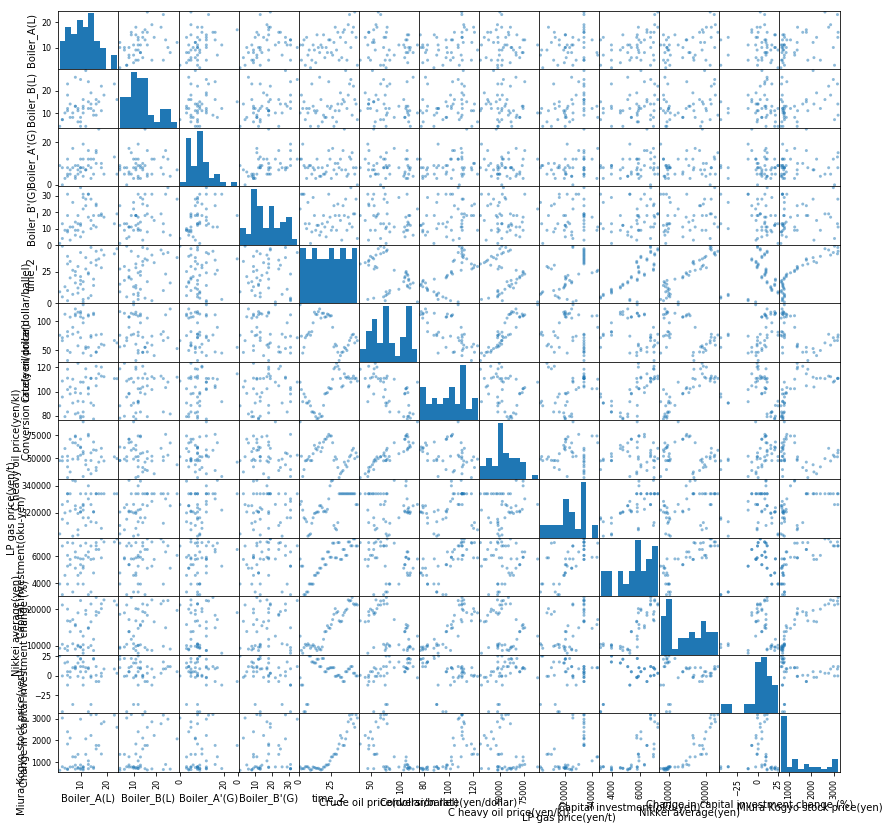

In [5]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_boiler, figsize=(14,14))
plt.show()

In [6]:
# 相関係数を確認
df_boiler.corr()

,Boiler_A(L),Boiler_B(L),Boiler_A'(G),Boiler_B'(G),time_2,Crude oil price(dollar/ballel),Conversion rate(yen/dollar),C heavy oil price(yen/kl),LP gas price(yen/t),Capital investment(oku-yen),Nikkei average(yen),Change in capital investment change (%),Miura Kogyo stock price(yen)
Boiler_A(L),1.000000,0.323045,0.312565,0.321344,0.422959,-0.168770,0.331697,-0.035956,0.235606,0.439018,0.460451,0.011637,0.421406
Boiler_B(L),0.323045,1.000000,0.124982,0.353331,0.260753,-0.148968,0.122545,-0.111302,0.391473,0.201677,0.228922,-0.003354,0.312716
Boiler_A'(G),0.312565,0.124982,1.000000,0.415059,0.021950,-0.188703,0.224016,-0.089067,0.256663,0.212872,0.109684,-0.084345,0.049145
Boiler_B'(G),0.321344,0.353331,0.415059,1.000000,-0.032896,-0.221755,0.228752,-0.142565,0.046077,0.120497,0.099019,-0.283598,0.077428
time_2,0.422959,0.260753,0.021950,-0.032896,1.000000,-0.417960,0.667708,-0.174088,0.556479,0.827648,0.925745,0.207628,0.896594
Crude oil price(dollar/ballel),-0.168770,-0.148968,-0.188703,-0.221755,-0.417960,1.000000,-0.638213,0.899849,-0.052374,-0.253022,-0.492741,0.414289,-0.524876
Conversion rate(yen/dollar),0.331697,0.122545,0.224016,0.228752,0.667708,-0.638213,1.000000,-0.255214,0.318357,0.701029,0.848886,-0.207211,0.657751
C heavy oil price(yen/kl),-0.035956,-0.111302,-0.089067,-0.142565,-0.174088,0.899849,-0.255214,1.000000,0.115927,0.043019,-0.152446,0.369111,-0.287348
LP gas price(yen/t),0.235606,0.391473,0.256663,0.046077,0.556479,-0.052374,0.318357,0.115927,1.000000,0.633007,0.470592,0.128251,0.518248
Capital investment(oku-yen),0.439018,0.201677,0.212872,0.120497,0.827648,-0.253022,0.701029,0.043019,0.633007,1.000000,0.818339,0.313985,0.702577


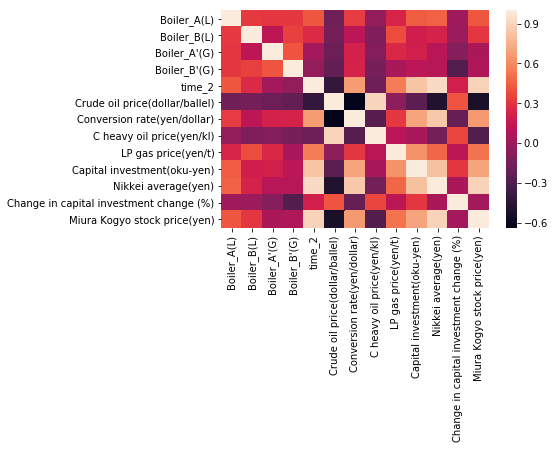

In [7]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_boiler.corr())
plt.show()

In [8]:
df_boiler.describe()

,Boiler_A(L),Boiler_B(L),Boiler_A'(G),Boiler_B'(G),time_2,Crude oil price(dollar/ballel),Conversion rate(yen/dollar),C heavy oil price(yen/kl),LP gas price(yen/t),Capital investment(oku-yen),Nikkei average(yen),Change in capital investment change (%),Miura Kogyo stock price(yen)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,11.000000,13.333333,8.866667,16.577778,23.000000,80.149467,100.555556,54114.444444,324095.372222,5616.274200,14872.570148,3.193333,1432.410148
std,5.191777,6.138552,4.887833,8.732096,13.133926,26.678063,13.501256,13386.096171,10745.771126,1206.517242,4990.646511,16.777656,866.410641
min,2.000000,4.000000,0.000000,1.000000,1.000000,32.160000,77.140000,28850.000000,302471.070000,3149.271000,7890.666667,-45.600000,634.333333
25%,7.000000,9.000000,5.000000,10.000000,12.000000,57.400000,90.460000,47100.000000,316095.600000,4755.991000,9789.470000,-0.700000,729.666667
50%,11.000000,12.000000,8.000000,15.000000,23.000000,75.620000,102.350000,51750.000000,324996.530000,5797.553000,14861.143330,5.200000,900.776667
75%,14.000000,16.000000,12.000000,24.000000,34.000000,108.710000,110.940000,62100.000000,333929.600000,6753.000000,19288.093330,11.700000,2071.666667
max,24.000000,29.000000,26.000000,35.000000,45.000000,128.200000,123.510000,89550.000000,343874.870000,7278.390000,23179.636670,25.100000,3186.000000


5つのデータで、Boiler_A(L)の数値を予測してみたい。

ホールドアウト法で検証する。

学習前に、学習用データとテストデータに分けてみる。

In [9]:
#ホールドアウト法用にインポート
from sklearn.model_selection import train_test_split
X, y = df_boiler[["Nikkei average(yen)",
                  "Conversion rate(yen/dollar)",
                  "LP gas price(yen/t)",
                  "Miura Kogyo stock price(yen)",
                  "Capital investment(oku-yen)"]].values, df_boiler["Boiler_A(L)"].values
#とりあえず、学習サイズを70％、テストサイズは3０％にした
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#標準化操作
from sklearn.preprocessing import StandardScaler#インポート

stdsc = StandardScaler()
X_train_stand = stdsc.fit_transform(X_train)
X_test_stand  = stdsc.transform(X_test)#fitは上のを引き継ぐ

display(X_train_stand)
display(X_test_stand)
display(y_train)
display(y_test)

array([[ 1.45817684,  1.06212027,  0.16152344,  2.10375971,  1.09093385],
       [-0.52740363, -0.75514879, -0.34739743, -0.66708925,  0.25742865],
       [-1.07614278, -1.32898088,  0.07644511, -0.7751608 , -0.34322739],
       [ 0.12129655,  0.43678012,  0.5698979 , -0.52890711,  0.70755689],
       [-1.12163008, -1.51086875,  0.08572635, -0.82212342, -0.34322739],
       [ 1.82760741,  1.05246251,  0.93650679,  2.11726914,  1.10273966],
       [-1.03099461, -0.78090283, -1.93603627, -0.83743539, -1.36327713],
       [-1.15764824, -1.6678074 , -0.37060053, -0.73618031, -0.65120088],
       [-0.88084351, -0.59499089, -1.06514712, -0.64559768, -1.88196423],
       [-0.95996955, -1.47948102, -0.06122626, -0.78545884,  0.25742865],
       [ 0.48525786,  0.47541117,  0.93650679,  0.8701561 ,  0.22322032],
       [-0.97092105, -1.60825119, -0.37060053, -0.73141728, -0.65120088],
       [ 1.09886361,  1.13294387,  0.93650679,  0.82692593,  0.48443816],
       [-0.86156131, -0.47507367, -2.0

array([[ 0.51241746,  1.66492564,  0.93650679,  0.5544215 ,  1.31130549],
       [ 1.68830182,  1.1643316 ,  0.93650679,  1.73089955,  1.35238723],
       [ 1.19719596,  1.80657283, -1.53694305,  0.02446601,  0.32573886],
       [-0.80864994, -0.19499854, -0.88570922, -0.6507467 , -2.05285841],
       [-0.83363934, -1.19618664, -0.78052218, -0.66374277, -1.37127417],
       [ 0.58220358,  0.99693037,  1.89402146, -0.12297973,  1.27485517],
       [ 0.96096175,  2.06411318, -1.64058385,  0.00555281,  0.32573886],
       [-0.91962331, -1.25574284, -0.47424134, -0.68921769, -0.80649618],
       [ 1.62808604,  1.04039031,  0.93650679,  2.0852325 ,  1.35238723],
       [ 0.45588704,  1.04924325,  0.93650679,  1.00679429,  0.22322032],
       [ 1.02936398,  1.86451941, -1.1270214 ,  0.29195265,  1.31130549],
       [-0.088643  ,  0.04966479, -0.36286648, -0.55566736, -0.11592214],
       [ 1.46846374,  1.20537709,  0.93650679,  1.62977184,  1.54926938],
       [-1.30850564, -0.50726621, -0.2

array([14, 15,  8, 13, 11, 16,  2, 15, 14, 10,  6, 10, 12,  9, 17,  5, 12,
        4, 16,  8,  7, 13,  5,  8,  6,  5, 10, 24, 13, 11,  3],
      dtype=int64)

array([ 5, 19, 18,  3, 11,  7,  9,  9, 23, 14, 16, 10, 18, 11],
      dtype=int64)

上記説明変数から目的変数を求めてみたい。

In [10]:
#consumeと説明変数3つとの線形回帰
# 係数を求める
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train_stand, y_train)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]

# 重みと二乗誤差の確認
# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train_stand)
squared_error = 0.5 * np.sum((y_train - y_pred_train) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}'.format(w0, w1, w2, w3, w4, w5))
print('学習時の二乗誤差 = {:.3f}'.format(squared_error))

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

# MSEを計算
mse = mean_squared_error(y_train, y_pred_train) 
print("学習時のMSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_train, y_pred_train) 
print("学習時のMAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("学習時のRMSE = %s"%round(rmse, 3) )

# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test_stand)
squared_error_test = 0.5 * np.sum((y_test - y_pred_test) ** 2)
print('テスト時の二乗誤差 = {:.3f}'.format(squared_error_test))

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("テスト時のMSE = %s"%round(mse, 3) )  

# MAEを計算
mae = mean_absolute_error(y_test, y_pred_test) 
print("テスト時のMAE = %s"%round(mae, 3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("テスト時のRMSE = %s"%round(rmse, 3) )

w0 = 10.387, w1 = 2.167, w2 = -0.327, w3 = 0.569, w4 = -1.328, w5 = 0.698
学習時の二乗誤差 = 302.110
学習時のMSE = 19.491
学習時のMAE = 3.542
学習時のRMSE = 4.415
テスト時の二乗誤差 = 188.233
テスト時のMSE = 26.89
テスト時のMAE = 4.425
テスト時のRMSE = 5.186


現状あまり良くない。
説明変数に掛かる係数wが0のものもあるため、上手くいっていないと考える。